# Spotify Top 1000 Tracks - Data Analysis Project
This project involves exploratory data analysis (EDA) of a dataset containing the top 1000 tracks on Spotify. The analysis aims to identify trends, patterns, and potential insights using Python libraries like pandas, seaborn, and matplotlib.

### Goals of this analysis:
- Understand key attributes of popular tracks (e.g., duration, popularity, release year).
- Explore artist and track trends.
- Visualize relationships between different features.

This notebook is part of a junior data analyst portfolio.

## Exploring the Spotify Data

In [2]:
# IMPORTANT NOTES ABOUT DATA 
               
# Track_name: The title of the song or track.

# Artist: Name(s) of the track's performing artist(s).

# Album: The album in which the track was initially released.

# Release_date: The official release date of the track or album (format: DD-MM-YYYY).

# Popularity: A score (0–100) based on how frequently the track is streamed, shared, and added to playlists. Higher means more popular.

# Spotify_url: Direct URL to the track on Spotify, useful for previewing or sharing.

# Duration_min: Duration of the track in minutes (converted from milliseconds).


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
# Load the dataset and create a dataframe

df = pd.read_csv("spotify_top_1000_tracks.csv")

In [5]:
# First look at the dataset

print(df.head())

                 track_name          artist  \
0  All The Stars (with SZA)  Kendrick Lamar   
1                   Starboy      The Weeknd   
2                  Señorita    Shawn Mendes   
3                Heat Waves   Glass Animals   
4           Let Me Love You        DJ Snake   

                                               album release_date  popularity  \
0  Black Panther The Album Music From And Inspire...   2018-02-09          95   
1                                            Starboy   2016-11-25          90   
2                                           Señorita   2019-06-21          80   
3                                          Dreamland   2020-08-07          87   
4                                             Encore   2016-08-05          87   

                                         spotify_url                      id  \
0  https://open.spotify.com/track/3GCdLUSnKSMJhs4...  3GCdLUSnKSMJhs4Tj6CV3s   
1  https://open.spotify.com/track/7MXVkk9YMctZqd1...  7MXVkk9YMctZqd1S

In [6]:
# General Information about dataset

print(df.info())

print(df.shape)

print(df.columns)

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    1000 non-null   object 
 1   artist        1000 non-null   object 
 2   album         1000 non-null   object 
 3   release_date  1000 non-null   object 
 4   popularity    1000 non-null   int64  
 5   spotify_url   1000 non-null   object 
 6   id            1000 non-null   object 
 7   duration_min  1000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB
None
(1000, 8)
Index(['track_name', 'artist', 'album', 'release_date', 'popularity',
       'spotify_url', 'id', 'duration_min'],
      dtype='object')
        popularity  duration_min
count  1000.000000   1000.000000
mean     56.669000      3.318516
std      28.192805      0.849591
min       0.000000      0.969150
25%      37.000000      2.754021
50%      68.000000      3.293833
75%      79.000000 

In [7]:
# Checking for duplicates and missing values

print(df.isna().sum()) # No missing values in every column

print(df[df.duplicated()]) # No duplicate rows in dataset.


track_name      0
artist          0
album           0
release_date    0
popularity      0
spotify_url     0
id              0
duration_min    0
dtype: int64
Empty DataFrame
Columns: [track_name, artist, album, release_date, popularity, spotify_url, id, duration_min]
Index: []


In [8]:
# Let's check "release_date" column for data type.
print(df["release_date"].dtype) # --> Right now , it is stored as object datatype. Lets convert it to date ! 

object


In [9]:
# Converting the "release_date" column into date datatype.
df["release_date"] = df["release_date"].apply(pd.to_datetime)
print(df["release_date"].dtype)

datetime64[ns]


## General Analysis of the Dataset

In [11]:
# First Analysis : Let's check how many unique artists we have in the dataset !

unique_artist = df["artist"].nunique() # Gather number of unique artists
print(unique_artist)

526


In [12]:
# Second Analysis : Let's check how many unique albums we have in the dataset ! 

unique_albums = df["album"].nunique() # Gather number of unique albums
print(unique_albums)

822


In [13]:
# Third Analysis : Let's check distribution of songs according to their release years !

df["release_year"] = df["release_date"].dt.year # Keep in mind that a new column named "release_year" is added.

dist_release_year = df.value_counts("release_year") # Count song number for every year

df_dist_release_year = dist_release_year.to_frame() # Convert series to dataframe

df_dist_release_year = df_dist_release_year.rename(columns = {"count" : "song_count"}) # Conver "count" column into "song_count" column in order to make things easier to understand. 

print(df_dist_release_year)


              song_count
release_year            
2024                 137
2018                  87
2019                  76
2021                  69
2017                  64
2022                  56
2020                  56
2023                  49
2016                  49
2015                  49
2012                  43
2014                  42
2013                  35
2025                  32
2011                  29
2007                  26
2010                  25
2009                  14
2008                   9
2002                   8
2005                   7
2006                   7
1997                   6
2003                   5
2004                   4
2000                   4
2001                   2
1985                   2
1981                   1
1992                   1
1984                   1
1999                   1
1994                   1
1996                   1
1998                   1
1976                   1


In [14]:
# Fourth Analysis : Let's check the average duration of these songs ! 

print(df["duration_min"].dtype) # --> Check if duration of these songs stored in a proper format. (Since they are in float format , we can keep moving on !)

print(df["duration_min"].mean()) # Calculate the average duration values of these 1000 songs 

float64
3.3185161666666665


In [15]:
# Fifth Analysis : Let's check the average popularity score of these songs ! 

print(df['popularity'].dtype) # --> Check if popularity score of these songs are stored in  a proper format. (Since they are in int format , we can keep moving on !)

print(df["popularity"].mean()) # Calculate the average popularity score of these 1000 songs  

int64
56.669


In [16]:
# Sixth Analysis : Let's check how has the average popularity of songs changed by release year ! 

yearly_popularity = df.groupby("release_year")["popularity"].mean() # Group every song released in every year and calculate their average popularity score.

df_yearly_popularity = yearly_popularity.to_frame() # Convert series to dataframe.

df_yearly_popularity = df_yearly_popularity.rename(columns = {"popularity" : "avg_popularity"}) # Convert "popularity" column in to "avg_popularity" , since we are calculating avg_popularity.

print(df_yearly_popularity)


              avg_popularity
release_year                
1976               72.000000
1981               67.000000
1984                2.000000
1985               46.500000
1992               66.000000
1994               74.000000
1996               82.000000
1997               53.833333
1998               75.000000
1999               81.000000
2000               84.750000
2001               72.000000
2002               78.250000
2003               54.200000
2004               55.250000
2005               42.428571
2006               52.142857
2007               53.653846
2008               76.222222
2009               59.928571
2010               62.160000
2011               66.413793
2012               62.186047
2013               59.314286
2014               55.976190
2015               66.387755
2016               68.142857
2017               68.500000
2018               67.781609
2019               65.828947
2020               57.857143
2021               53.637681
2022          

In [17]:
# Seventh Analysis : Let's check the most popular 10 songs using  "popularity" column and get their track names and artists!

most_popular_10_songs = df.sort_values("popularity" , ascending = False).head(10)
print(most_popular_10_songs[["track_name","artist"]])

                                         track_name             artist
611                                  That’s So True      Gracie Abrams
606                                            APT.               ROSÉ
0                          All The Stars (with SZA)     Kendrick Lamar
771  One Of The Girls (with JENNIE, Lily Rose Depp)         The Weeknd
484                                I Wanna Be Yours     Arctic Monkeys
615                                            blue           yung kai
83                                           Yellow           Coldplay
628                                 Sweater Weather  The Neighbourhood
743                                    Show Me Love           WizTheMc
34                                     Cruel Summer       Taylor Swift


In [18]:
# Eighth Analysis : Let's check the top 10 artists who has the most number of appearances in the dataset !

most_apps_artist = df.value_counts("artist").head(10) # Gather every artists song count in the list and print the top 10.

df_most_apps_artist  = most_apps_artist.to_frame() # Convert it to dataframe

df_most_apps_artist = df_most_apps_artist.rename(columns = {"count":"song_count"}) # Convert "count" column to "song_count"

print(df_most_apps_artist)

               song_count
artist                   
The Weeknd             26
Taylor Swift           25
Avril Lavigne          21
Alan Walker            14
Selena Gomez           12
Ariana Grande          12
Justin Bieber          11
Ed Sheeran             11
Demi Lovato             9
Rihanna                 9


In [19]:
# Nineth Analysis : Let's check who are top 5 artists with the highest average popularity? (among those with at least 3 songs)

artist_song_group = df.groupby("artist")["track_name"].count() # Group artists by their track number which is in the dataset.

min_three_song_artists = artist_song_group[artist_song_group >= 3] # Gather artists who has at least 3 songs in the dataset.

min_three_song_artists = min_three_song_artists.to_frame() # Convert it to df

min_three_song_artists_sorted = min_three_song_artists.sort_values("track_name" , ascending = False) # Sort song numbers  in a descending order.

min_three_song_artists_only_name  = min_three_song_artists.index # Gather artist names

min_three_song_artists_only_name = list(min_three_song_artists_only_name) # Convert artist names to list in order to make further operations easier.

highest_pop_avg_df = df[df["artist"].isin(min_three_song_artists_only_name)] # Create a df which only contains artist who has at least 3 or more songs.

highest_pop_avg_df_grouped = highest_pop_avg_df.groupby("artist")["popularity"].mean().sort_values(ascending = False) # Group the last df by artist in a descending order of their popularity.

print(highest_pop_avg_df_grouped.head()) # Gather top 5 artist who has the most avg popularity.


artist
Kendrick Lamar    89.000000
One Direction     85.400000
Eminem            84.400000
Olivia Rodrigo    84.333333
Frank Ocean       84.000000
Name: popularity, dtype: float64


In [20]:
# Tenth Analysis : Among artists with only 1 song, which is the most popular song?

artist_song_group = df.groupby("artist")["track_name"].count() # Group artists by their track number which is in the dataset

artists_with_one_song = artist_song_group[artist_song_group == 1].to_frame() # Select artist with only 1 song in the dataset and convert the type to df.

artists_with_one_song_index = artists_with_one_song.index # Select artist names

artists_with_one_song_index_list = list(artists_with_one_song_index) # Convert artist names to list in order to make further operations easier.

artists_with_one_song_most_popularity = df[df["artist"].isin(artists_with_one_song_index_list)][["artist" ,"track_name","popularity"]].sort_values("popularity" , ascending = False) # Select artists , song names and popularities of songs and sort them in a decreasing order. 

print(artists_with_one_song_most_popularity.head(1)) # Select the song which has the highest popularity score.


            artist      track_name  popularity
611  Gracie Abrams  That’s So True          97


## Graphical Analysis of the Dataset

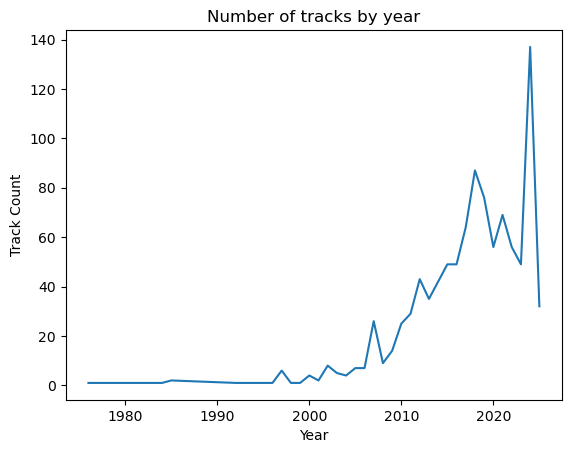

In [22]:
# First Graph Analysis : Number of tracks by year

df["release_year"] = pd.to_numeric(df["release_year"])
df_tracks_by_year = df.groupby("release_year")["track_name"].count()

plt.plot(df_tracks_by_year)

plt.title("Number of tracks by year")

plt.xlabel("Year")
plt.ylabel("Track Count")

plt.show()


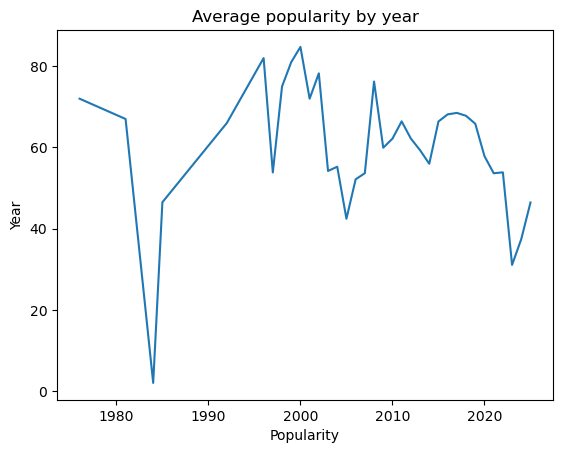

In [23]:
# Second Graph Analysis : Average Popularity by Year

avg_pop_by_year = df.groupby("release_year")["popularity"].mean()


plt.plot(avg_pop_by_year)

plt.title("Average popularity by year")

plt.xlabel("Popularity")
plt.ylabel("Year")

plt.show()


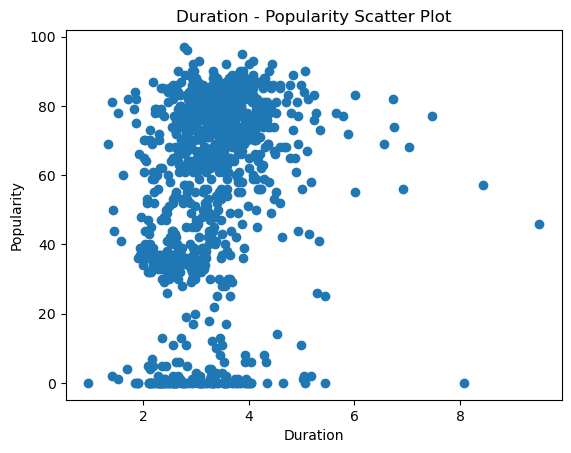

              duration_min  popularity
duration_min      1.000000    0.256154
popularity        0.256154    1.000000


In [24]:
# Third Graph Analysis : Are longer songs less popular? Is there a correlation?

plt.scatter(df["duration_min"],df["popularity"])

plt.title("Duration - Popularity Scatter Plot")
plt.xlabel("Duration")
plt.ylabel("Popularity")
plt.show()


correlation = df[["duration_min" , "popularity"]].corr()
print(correlation)

0      Pop(80-100)
1      Pop(80-100)
2       Pop(60-80)
3      Pop(80-100)
4      Pop(80-100)
          ...     
995      Pop(0-20)
996      Pop(0-20)
997      Pop(0-20)
998      Pop(0-20)
999      Pop(0-20)
Name: grouped_popularity, Length: 1000, dtype: category
Categories (5, object): ['Pop(0-20)' < 'Pop(20-40)' < 'Pop(40-60)' < 'Pop(60-80)' < 'Pop(80-100)']


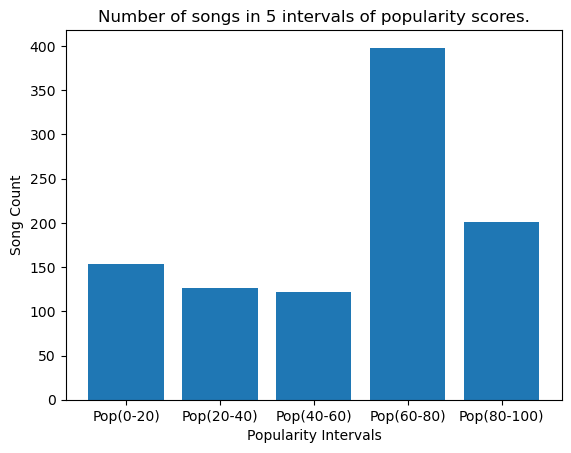

In [93]:
# Fourth Graph Analysis : Number of songs in 5 intervals of popularity scores.



bin_ranges = [-1,20,40,60,80,100]
label_names = ["Pop(0-20)","Pop(20-40)","Pop(40-60)","Pop(60-80)","Pop(80-100)"]

df["grouped_popularity"] = pd.cut(df["popularity"] , bins = bin_ranges , labels = label_names)
print(df["grouped_popularity"])

popularity_counts = df["grouped_popularity"].value_counts().sort_index()

plt.bar(popularity_counts.index , popularity_counts.values)

plt.title("Number of songs in 5 intervals of popularity scores.")
plt.xlabel("Popularity Intervals")
plt.ylabel("Song Count")

plt.show()


